In [3]:
import csv
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('heavyHitterProduct.csv')

df

,Product Name,Product Type,Description,Price (USD),Sales Volume (Monthly),Customer Satisfaction Rating (1-5)
0,HEAVY POD SYSTEM,Vape,Purest Hit. Cleanest High.,49.99,500,4.5
1,SPIKED DIAMONDS POD SYSTEM,Vape,Made with 99% pure THCA Diamonds,59.99,300,4.8
2,ULTRA EXTRACT 2G,Packaged Goods,Full Spectrum 2G Ultra Blend,39.99,700,4.3
3,ULTRA EXTRACT 1G,Packaged Goods,High Potency Cannabis Vape,29.99,800,4.2
4,LIGHTS ON ENERGY,Vape,THCV Amplified Energy Vape,44.99,600,4.6
5,LIGHTS OUT SLEEP,Vape,CBN Infused Sleep Vape,39.99,400,4.7
6,PURE LIVE ROSIN,Vape Cartridge,100% Live Rosin Solventless Vape,69.99,200,4.9
7,ACAPULCO GOLD,Vape Cartridge,25th Anniversary Special Edition Vape,59.99,250,4.8
8,GREEN CRACK,All-In-One Vape,Lights On THCV Energy - 0.3G All-In-One Vape,49.99,450,4.6
9,CLOUDBERRY,All-In-One Vape,Lights Out CBN Sleep - 0.3G All-In-One Vape,49.99,350,4.7


In [5]:
df['Total Rev'] = df['Price (USD)'] * df['Sales Volume (Monthly)']
df

,Product Name,Product Type,Description,Price (USD),Sales Volume (Monthly),Customer Satisfaction Rating (1-5),Total Rev
0,HEAVY POD SYSTEM,Vape,Purest Hit. Cleanest High.,49.99,500,4.5,24995.0
1,SPIKED DIAMONDS POD SYSTEM,Vape,Made with 99% pure THCA Diamonds,59.99,300,4.8,17997.0
2,ULTRA EXTRACT 2G,Packaged Goods,Full Spectrum 2G Ultra Blend,39.99,700,4.3,27993.0
3,ULTRA EXTRACT 1G,Packaged Goods,High Potency Cannabis Vape,29.99,800,4.2,23992.0
4,LIGHTS ON ENERGY,Vape,THCV Amplified Energy Vape,44.99,600,4.6,26994.0
5,LIGHTS OUT SLEEP,Vape,CBN Infused Sleep Vape,39.99,400,4.7,15996.0
6,PURE LIVE ROSIN,Vape Cartridge,100% Live Rosin Solventless Vape,69.99,200,4.9,13998.0
7,ACAPULCO GOLD,Vape Cartridge,25th Anniversary Special Edition Vape,59.99,250,4.8,14997.5
8,GREEN CRACK,All-In-One Vape,Lights On THCV Energy - 0.3G All-In-One Vape,49.99,450,4.6,22495.5
9,CLOUDBERRY,All-In-One Vape,Lights Out CBN Sleep - 0.3G All-In-One Vape,49.99,350,4.7,17496.5


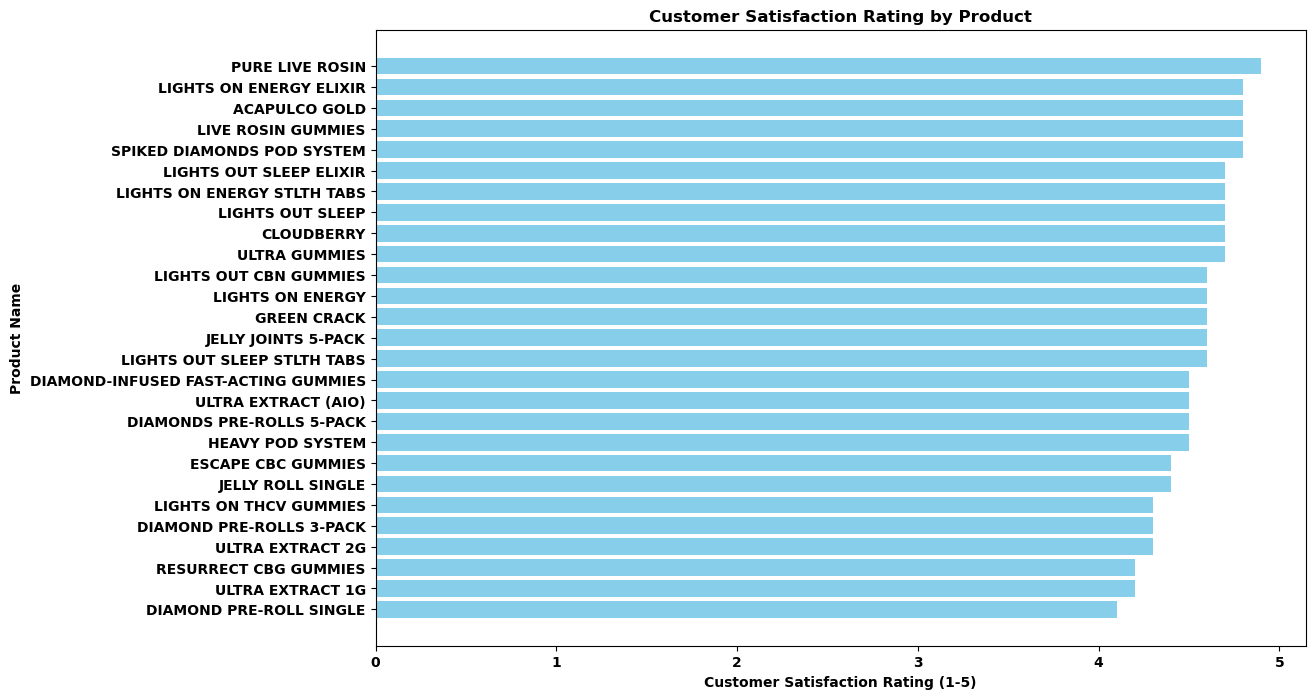

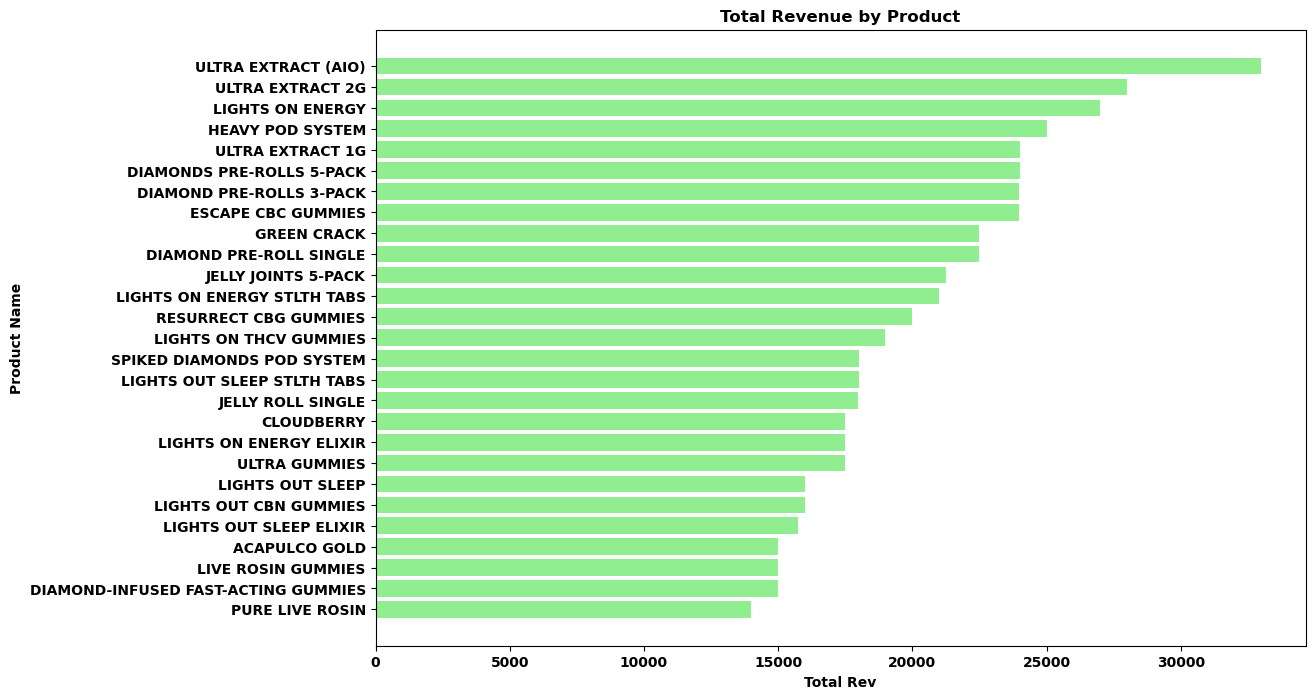

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Sort DataFrame by customer satisfaction rating
df = df.sort_values(by='Customer Satisfaction Rating (1-5)', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(df['Product Name'], df['Customer Satisfaction Rating (1-5)'], color='skyblue')
plt.xlabel('Customer Satisfaction Rating (1-5)')
plt.ylabel('Product Name')
plt.title('Customer Satisfaction Rating by Product')
plt.gca().invert_yaxis()
plt.show()

df = df.sort_values(by='Total Rev', ascending=False)
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(df['Product Name'], df['Total Rev'], color='lightgreen')
plt.xlabel('Total Rev')
plt.ylabel('Product Name')
plt.title('Total Revenue by Product')
plt.gca().invert_yaxis()
plt.show()


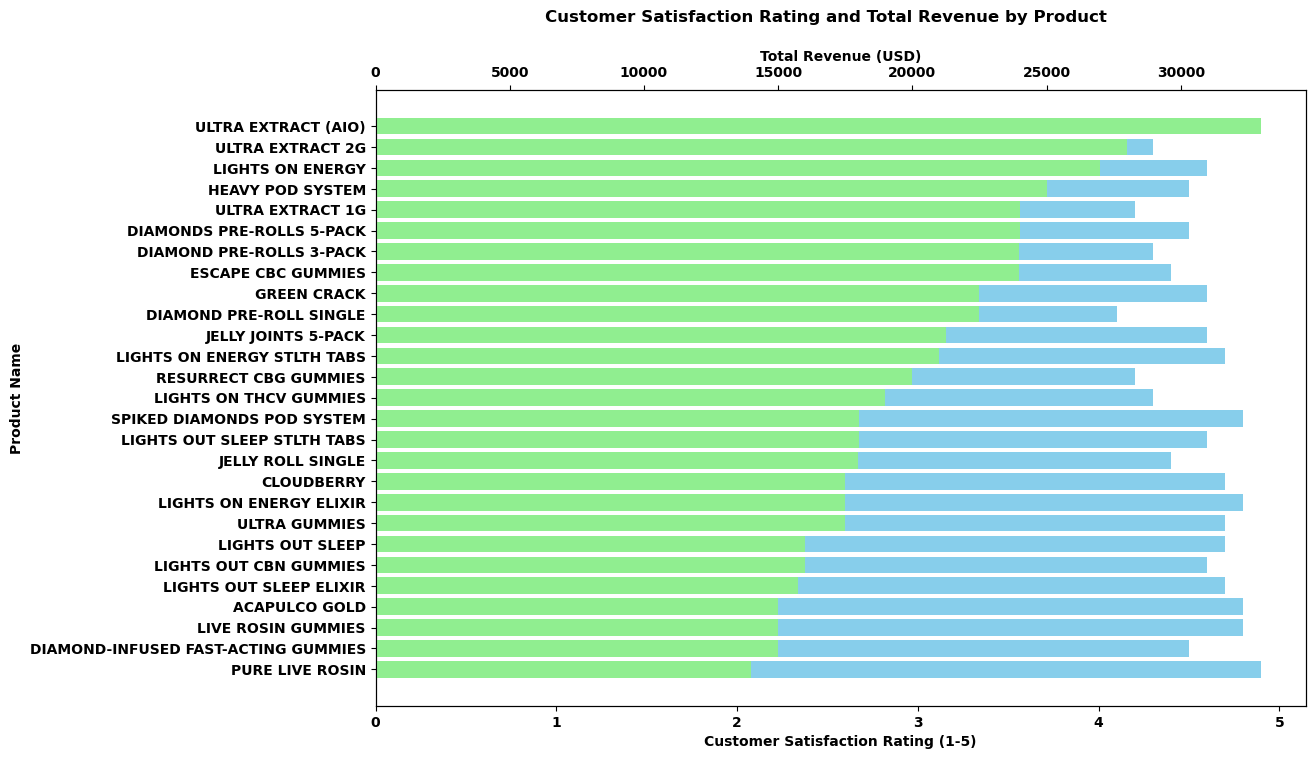

In [8]:
import matplotlib.pyplot as plt

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Customer Satisfaction Ratings
ax1.barh(df['Product Name'], df['Customer Satisfaction Rating (1-5)'], color='skyblue', label='Customer Satisfaction Rating')
ax1.set_xlabel('Customer Satisfaction Rating (1-5)')
ax1.set_ylabel('Product Name')

# Total Revenue
ax2 = ax1.twiny()
ax2.barh(df['Product Name'], df['Total Rev'], color='lightgreen', label='Total Revenue (USD)')
ax2.set_xlabel('Total Revenue (USD)')

# Common Title and Invert Y-axis
fig.suptitle('Customer Satisfaction Rating and Total Revenue by Product')
ax1.invert_yaxis()
plt.show()


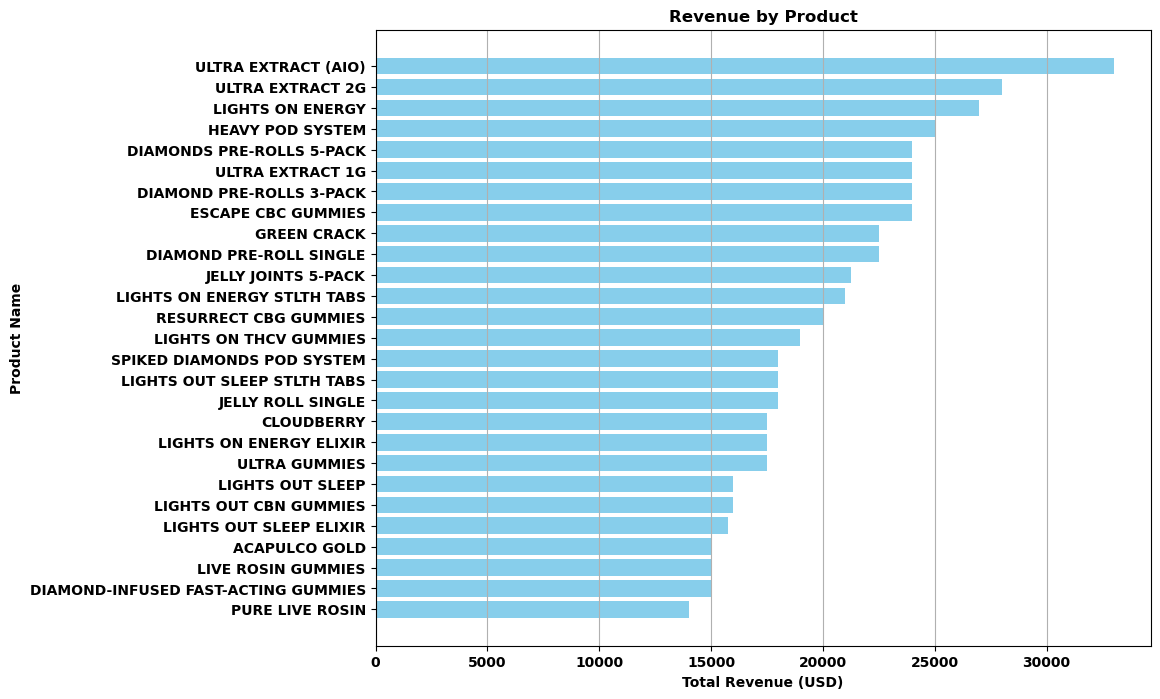

In [21]:
# Sort DataFrame by Total Rev
df_sorted = df.sort_values(by='Total Rev')

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(df_sorted['Product Name'], df_sorted['Total Rev'], color='skyblue')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Product Name')
plt.title('Revenue by Product')
plt.grid(axis='x')
plt.show()

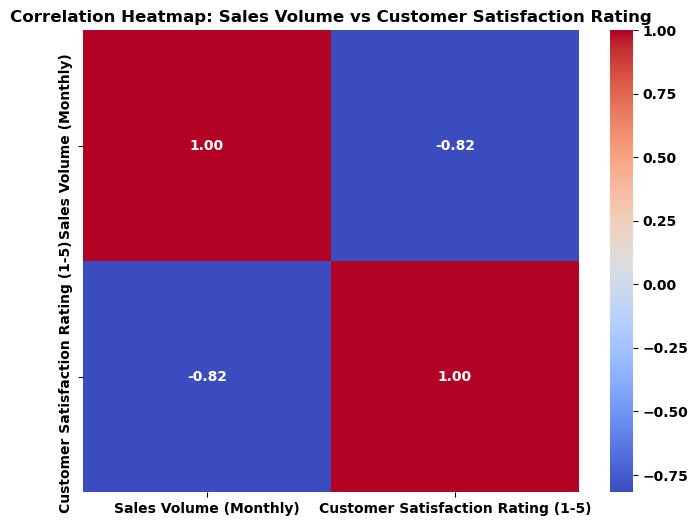

In [13]:
import seaborn as sns
corr_matrix = df[['Sales Volume (Monthly)', 'Customer Satisfaction Rating (1-5)']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Sales Volume vs Customer Satisfaction Rating')
plt.show()

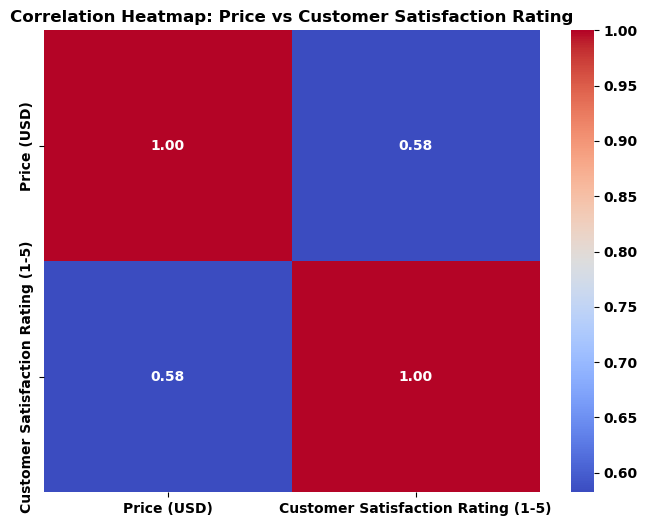

In [14]:
corr_matrix = df[['Price (USD)', 'Customer Satisfaction Rating (1-5)']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Price vs Customer Satisfaction Rating')
plt.show()

In [ ]:
corr_matrix = df[['Price (USD)', 'Customer Satisfaction Rating (1-5)']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Price vs Customer Satisfaction Rating')
plt.show()

In [17]:
# Sort DataFrame by Product Type
df_sorted = df.sort_values(by='Product Type')
df_sorted

,Product Name,Product Type,Description,Price (USD),Sales Volume (Monthly),Customer Satisfaction Rating (1-5),Total Rev
8,GREEN CRACK,All-In-One Vape,Lights On THCV Energy - 0.3G All-In-One Vape,49.99,450,4.6,22495.5
9,CLOUDBERRY,All-In-One Vape,Lights Out CBN Sleep - 0.3G All-In-One Vape,49.99,350,4.7,17496.5
10,ULTRA EXTRACT (AIO),All-In-One Vape,High Potency All-In-One Vape,59.99,550,4.5,32994.5
25,LIGHTS ON ENERGY ELIXIR,Elixirs,Amplified with Caffeine & THCV,34.99,500,4.8,17495.0
26,LIGHTS OUT SLEEP ELIXIR,Elixirs,Packed with L-theanine & CBN,34.99,450,4.7,15745.5
11,RESURRECT CBG GUMMIES,Gummies,Recover and Rise above the grind,19.99,1000,4.2,19990.0
17,LIVE ROSIN GUMMIES,Gummies,Pure. Potent. Solventless.,29.99,500,4.8,14995.0
14,LIGHTS ON THCV GUMMIES,Gummies,Charged All Day Energy Gummies,19.99,950,4.3,18990.5
15,ULTRA GUMMIES,Gummies,The Heaviest Hitting Gummies,24.99,700,4.7,17493.0
12,ESCAPE CBC GUMMIES,Gummies,For those who want to feel happy as F**K,19.99,1200,4.4,23988.0


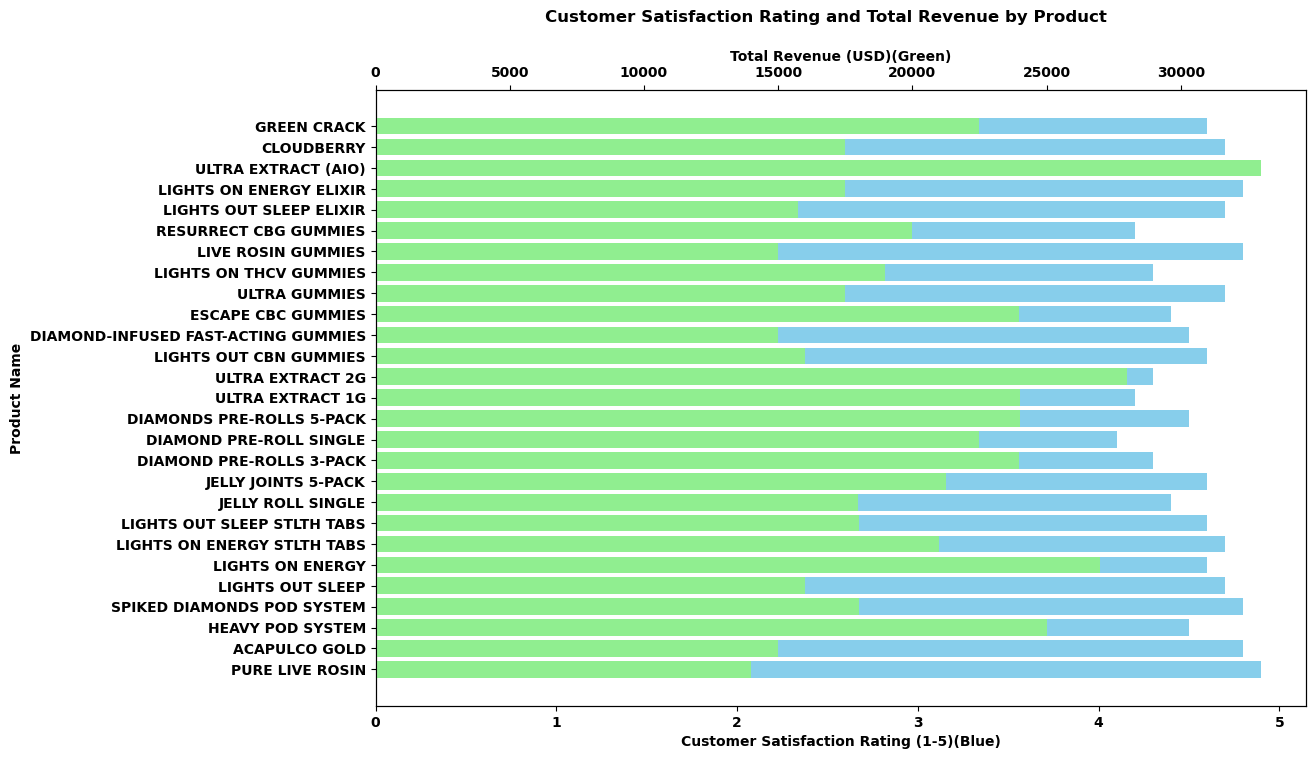

In [20]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Customer Satisfaction Ratings
ax1.barh(df_sorted['Product Name'], df_sorted['Customer Satisfaction Rating (1-5)'], color='skyblue', label='Customer Satisfaction Rating')
ax1.set_xlabel('Customer Satisfaction Rating (1-5)(Blue)')
ax1.set_ylabel('Product Name')

# Total Revenue
ax2 = ax1.twiny()
ax2.barh(df_sorted['Product Name'], df_sorted['Total Rev'], color='lightgreen', label='Total Revenue (USD)')
ax2.set_xlabel('Total Revenue (USD)(Green)')

# Common Title and Invert Y-axis
fig.suptitle('Customer Satisfaction Rating and Total Revenue by Product')
ax1.invert_yaxis()
plt.show()

In [1]:
from fbprophet import Prophet
# Prepare data for Prophet
df_prophet = df.rename(columns={'Sales Volume (Monthly)': 'y'})
df_prophet['ds'] = df_prophet.index + 1  # Assuming each row represents a month

# Instantiate Prophet and fit the model
model = Prophet()
model.fit(df_prophet)

# Define the periods for which you want to forecast
future = model.make_future_dataframe(periods=12, freq='M')  # Forecasting for 12 months

# Make the forecast
forecast = model.predict(future)

# Visualize the forecast
fig = model.plot(forecast)



ModuleNotFoundError: No module named 'fbprophet'